# Comp3115 Group J Sorce Code

In [33]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
from tqdm import tqdm # for making progress bar
from time import gmtime, strftime, time
import urllib.parse
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

## Task 1
19222947 Lam Shiu Ching

### Step 1

In [ ]:
# Task 1

## Task 2
19223277 Tam Chi Him

### Step 1

In [ ]:
# Task 2

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
from tqdm import tqdm # for making progress bar
df = pd.read_csv('bar_vaccination_date.csv')
df1 = pd.read_csv('latest_situation_of_reported_cases_covid_19_eng.csv')
df.head(5)

,date,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,...,thirdDose.movingAvg.biontech,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,totalDose.movingAvg.sinovac,totalDose.movingAvg.biontech,totalDose.movingAvg.total
0,22/2/2021,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,...,NaN,47.0,0.0,47.0,47.0,0.0,47.0,NaN,NaN,NaN
1,23/2/2021,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,...,NaN,532.0,0.0,532.0,579.0,0.0,579.0,NaN,NaN,NaN
2,24/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,579.0,0.0,579.0,NaN,NaN,NaN
3,25/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,579.0,0.0,579.0,NaN,NaN,NaN
4,26/2/2021,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,...,NaN,6044.0,0.0,6044.0,6623.0,0.0,6623.0,NaN,NaN,NaN


In [2]:
### Data Cleaning

In [3]:
df = df.drop('firstDose.movingAvg.sinovac',axis = 1)
df = df.drop('firstDose.movingAvg.total',axis = 1)
df = df.drop('firstDose.movingAvg.biontech',axis = 1)
df = df.drop('secondDose.movingAvg.sinovac',axis = 1)
df = df.drop('secondDose.movingAvg.total',axis = 1)
df = df.drop('secondDose.movingAvg.biontech',axis = 1)
df = df.drop('thirdDose.movingAvg.sinovac',axis = 1)
df = df.drop('thirdDose.movingAvg.total',axis = 1)
df = df.drop('thirdDose.movingAvg.biontech',axis = 1)
df = df.drop('totalDose.movingAvg.sinovac',axis = 1)
df = df.drop('totalDose.movingAvg.biontech',axis = 1)
df = df.drop('totalDose.movingAvg.total',axis = 1)

In [4]:
df.head()

,date,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,...,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total
0,22/2/2021,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0
1,23/2/2021,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0
2,24/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0
3,25/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0
4,26/2/2021,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0


In [5]:
df=df.dropna()
df.tail()

,date,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,...,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total
398,27/3/2022,1205.0,1688.0,2893.0,2807207.0,3695418.0,6502625.0,7417.0,5122.0,12539.0,...,24263.0,904845.0,1797078.0,2701923.0,13163.0,26532.0,39695.0,6064750.0,8879324.0,14944074.0
399,28/3/2022,2752.0,1694.0,4446.0,2809959.0,3697112.0,6507071.0,16330.0,5166.0,21496.0,...,25858.0,912340.0,1815441.0,2727781.0,26577.0,25223.0,51800.0,6091327.0,8904547.0,14995874.0
400,29/3/2022,2718.0,1477.0,4195.0,2812677.0,3698589.0,6511266.0,14601.0,4828.0,19429.0,...,21800.0,918901.0,1830680.0,2749581.0,23880.0,21544.0,45424.0,6115207.0,8926091.0,15041298.0
401,30/3/2022,2565.0,1366.0,3931.0,2815242.0,3699955.0,6515197.0,14488.0,4210.0,18698.0,...,19909.0,925381.0,1844109.0,2769490.0,23533.0,19005.0,42538.0,6138740.0,8945096.0,15083836.0
402,31/3/2022,2874.0,1413.0,4287.0,2818116.0,3701368.0,6519484.0,13753.0,4032.0,17785.0,...,21977.0,931658.0,1859809.0,2791467.0,22904.0,21145.0,44049.0,6161644.0,8966241.0,15127885.0


In [6]:
df.head(5)

,date,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,...,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total
0,22/2/2021,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0
1,23/2/2021,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0
2,24/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0
3,25/2/2021,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0
4,26/2/2021,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0


In [7]:
df1.tail(5)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
809,27/03/2022,NaN,NaN,NaN,NaN,NaN,7252,44007,NaN,110.0,722901.0,405606.0
810,28/03/2022,NaN,NaN,NaN,NaN,NaN,7420,44418,NaN,108.0,726128.0,410064.0
811,29/03/2022,NaN,NaN,NaN,NaN,NaN,7571,45671,NaN,97.0,729292.0,414496.0
812,30/03/2022,NaN,NaN,NaN,NaN,NaN,7706,47140,NaN,89.0,732286.0,418483.0
813,31/03/2022,NaN,NaN,NaN,NaN,NaN,7825,48556,NaN,84.0,735145.0,422270.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   As of date                                                                   814 non-null    object 
 1   As of time                                                                   194 non-null    object 
 2   Number of confirmed cases                                                    724 non-null    float64
 3   Number of ruled out cases                                                    89 non-null     float64
 4   Number of cases still hospitalised for investigation                         89 non-null     float64
 5   Number of cases fulfilling the reporting criteria                            89 non-null     float64
 6   Number of death cases                     

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            403 non-null    object 
 1   firstDose.daily.sinovac         403 non-null    float64
 2   firstDose.daily.biontech        403 non-null    float64
 3   firstDose.daily.total           403 non-null    float64
 4   firstDose.cumulative.sinovac    403 non-null    float64
 5   firstDose.cumulative.biontech   403 non-null    float64
 6   firstDose.cumulative.total      403 non-null    float64
 7   secondDose.daily.sinovac        403 non-null    float64
 8   secondDose.daily.biontech       403 non-null    float64
 9   secondDose.daily.total          403 non-null    float64
 10  secondDose.cumulative.sinovac   403 non-null    float64
 11  secondDose.cumulative.biontech  403 non-null    float64
 12  secondDose.cumulative.total     403 

In [10]:
df.isna().sum()

date                              0
firstDose.daily.sinovac           0
firstDose.daily.biontech          0
firstDose.daily.total             0
firstDose.cumulative.sinovac      0
firstDose.cumulative.biontech     0
firstDose.cumulative.total        0
secondDose.daily.sinovac          0
secondDose.daily.biontech         0
secondDose.daily.total            0
secondDose.cumulative.sinovac     0
secondDose.cumulative.biontech    0
secondDose.cumulative.total       0
thirdDose.daily.sinovac           0
thirdDose.daily.biontech          0
thirdDose.daily.total             0
thirdDose.cumulative.sinovac      0
thirdDose.cumulative.biontech     0
thirdDose.cumulative.total        0
totalDose.daily.sinovac           0
totalDose.daily.biontech          0
totalDose.daily.total             0
totalDose.cumulative.sinovac      0
totalDose.cumulative.biontech     0
totalDose.cumulative.total        0
dtype: int64

In [11]:
df1.isna().sum()

As of date                                                                       0
As of time                                                                     620
Number of confirmed cases                                                       90
Number of ruled out cases                                                      725
Number of cases still hospitalised for investigation                           725
Number of cases fulfilling the reporting criteria                              725
Number of death cases                                                            0
Number of discharge cases                                                        0
Number of probable cases                                                        90
Number of hospitalised cases in critical condition                              89
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests     724
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests    780
dtyp

In [12]:
df1 = df1.drop('As of time',axis = 1)

In [13]:
### Replace na in "Number of confirmed cases" with "Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests"

In [14]:
df1['Number of confirmed cases'] = np.where(
  df1['Number of confirmed cases'].isna(),
  df1['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'],
  df1['Number of confirmed cases']
)
df1[df1['Number of confirmed cases'].isna()]

,As of date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests


In [15]:
df1.tail()

,As of date,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
809,27/03/2022,722901.0,NaN,NaN,NaN,7252,44007,NaN,110.0,722901.0,405606.0
810,28/03/2022,726128.0,NaN,NaN,NaN,7420,44418,NaN,108.0,726128.0,410064.0
811,29/03/2022,729292.0,NaN,NaN,NaN,7571,45671,NaN,97.0,729292.0,414496.0
812,30/03/2022,732286.0,NaN,NaN,NaN,7706,47140,NaN,89.0,732286.0,418483.0
813,31/03/2022,735145.0,NaN,NaN,NaN,7825,48556,NaN,84.0,735145.0,422270.0


In [16]:
df1.isna().sum()

As of date                                                                       0
Number of confirmed cases                                                        0
Number of ruled out cases                                                      725
Number of cases still hospitalised for investigation                           725
Number of cases fulfilling the reporting criteria                              725
Number of death cases                                                            0
Number of discharge cases                                                        0
Number of probable cases                                                        90
Number of hospitalised cases in critical condition                              89
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests     724
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests    780
dtype: int64

In [17]:
df1.index = df1['As of date']
df1.index

Index(['08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020', '12/01/2020',
       '13/01/2020', '14/01/2020', '15/01/2020', '16/01/2020', '17/01/2020',
       ...
       '22/03/2022', '23/03/2022', '24/03/2022', '25/03/2022', '26/03/2022',
       '27/03/2022', '28/03/2022', '29/03/2022', '30/03/2022', '31/03/2022'],
      dtype='object', name='As of date', length=814)

In [18]:
df.index = df['date']
df.index

Index(['22/2/2021', '23/2/2021', '24/2/2021', '25/2/2021', '26/2/2021',
       '27/2/2021', '28/2/2021', '1/3/2021', '2/3/2021', '3/3/2021',
       ...
       '22/3/2022', '23/3/2022', '24/3/2022', '25/3/2022', '26/3/2022',
       '27/3/2022', '28/3/2022', '29/3/2022', '30/3/2022', '31/3/2022'],
      dtype='object', name='date', length=403)

In [19]:
df1.index = pd.to_datetime(df1.index.astype(str),format="%d/%m/%Y")
df1.index

DatetimeIndex(['2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='As of date', length=814, freq=None)

In [20]:
df.index = pd.to_datetime(df.index.astype(str),format="%d/%m/%Y")
df.index

DatetimeIndex(['2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='date', length=403, freq=None)

In [21]:
df = df.join(df1['Number of confirmed cases'].loc['2021-02-22':'2022-03-31'])

In [22]:
df = df.join(df1['Number of death cases'].loc['2021-02-22':'2022-03-31'])

In [23]:
df = df.drop(['date'],axis=1)

In [24]:
df.head()

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,...,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,0.0,...,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0,10884.0,197
2021-02-23,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,...,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0,10896.0,197
2021-02-24,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,10913.0,197
2021-02-25,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,10926.0,198
2021-02-26,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0,10951.0,198


In [25]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,secondDose.cumulative.biontech,secondDose.cumulative.total,thirdDose.daily.sinovac,thirdDose.daily.biontech,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0,10884.0,197
2021-02-23,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0,10896.0,197
2021-02-24,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,10913.0,197
2021-02-25,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,10926.0,198
2021-02-26,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0,10951.0,198
2021-02-27,7039.0,0.0,7039.0,13662.0,0.0,13662.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7040.0,0.0,7040.0,13663.0,0.0,13663.0,10983.0,198
2021-02-28,7015.0,0.0,7015.0,20677.0,0.0,20677.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7015.0,0.0,7015.0,20678.0,0.0,20678.0,11005.0,199
2021-03-01,6408.0,0.0,6408.0,27085.0,0.0,27085.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6408.0,0.0,6408.0,27086.0,0.0,27086.0,11019.0,200
2021-03-02,13071.0,0.0,13071.0,40156.0,0.0,40156.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13071.0,0.0,13071.0,40157.0,0.0,40157.0,11032.0,200


In [26]:
df.isna().sum()

firstDose.daily.sinovac           0
firstDose.daily.biontech          0
firstDose.daily.total             0
firstDose.cumulative.sinovac      0
firstDose.cumulative.biontech     0
firstDose.cumulative.total        0
secondDose.daily.sinovac          0
secondDose.daily.biontech         0
secondDose.daily.total            0
secondDose.cumulative.sinovac     0
secondDose.cumulative.biontech    0
secondDose.cumulative.total       0
thirdDose.daily.sinovac           0
thirdDose.daily.biontech          0
thirdDose.daily.total             0
thirdDose.cumulative.sinovac      0
thirdDose.cumulative.biontech     0
thirdDose.cumulative.total        0
totalDose.daily.sinovac           0
totalDose.daily.biontech          0
totalDose.daily.total             0
totalDose.cumulative.sinovac      0
totalDose.cumulative.biontech     0
totalDose.cumulative.total        0
Number of confirmed cases         0
Number of death cases             0
dtype: int64

In [27]:
###Calculate daily confirmed cases and death cases

In [28]:
diffdf = df.diff(1)
diffdf.head()

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,secondDose.cumulative.biontech,secondDose.cumulative.total,thirdDose.daily.sinovac,thirdDose.daily.biontech,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-23,485.0,0.0,485.0,532.0,0.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485.0,0.0,485.0,532.0,0.0,532.0,12.0,0.0
2021-02-24,-532.0,0.0,-532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-532.0,0.0,-532.0,0.0,0.0,0.0,17.0,0.0
2021-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0
2021-02-26,6044.0,0.0,6044.0,6044.0,0.0,6044.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6044.0,0.0,6044.0,25.0,0.0


In [29]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
diffdf

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,secondDose.cumulative.biontech,secondDose.cumulative.total,thirdDose.daily.sinovac,thirdDose.daily.biontech,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-23,485.0,0.0,485.0,532.0,0.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485.0,0.0,485.0,532.0,0.0,532.0,12.0,0.0
2021-02-24,-532.0,0.0,-532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-532.0,0.0,-532.0,0.0,0.0,0.0,17.0,0.0
2021-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0
2021-02-26,6044.0,0.0,6044.0,6044.0,0.0,6044.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6044.0,0.0,6044.0,25.0,0.0
2021-02-27,995.0,0.0,995.0,7039.0,0.0,7039.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,996.0,0.0,996.0,7040.0,0.0,7040.0,32.0,0.0
2021-02-28,-24.0,0.0,-24.0,7015.0,0.0,7015.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-25.0,0.0,-25.0,7015.0,0.0,7015.0,22.0,1.0
2021-03-01,-607.0,0.0,-607.0,6408.0,0.0,6408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-607.0,0.0,-607.0,6408.0,0.0,6408.0,14.0,1.0
2021-03-02,6663.0,0.0,6663.0,13071.0,0.0,13071.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6663.0,0.0,6663.0,13071.0,0.0,13071.0,13.0,0.0


In [30]:
df= df.drop(['Number of confirmed cases'],axis=1)
df= df.join(diffdf['Number of confirmed cases'].loc['2021-02-22':'2022-03-31'])

In [31]:
df= df.drop(['Number of death cases'],axis=1)
df= df.join(diffdf['Number of death cases'].loc['2021-02-22':'2022-03-31'])

In [32]:
df.head()

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,secondDose.cumulative.biontech,secondDose.cumulative.total,thirdDose.daily.sinovac,thirdDose.daily.biontech,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0,NaN,NaN
2021-02-23,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0,12.0,0.0
2021-02-24,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,17.0,0.0
2021-02-25,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,13.0,1.0
2021-02-26,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0,25.0,0.0


In [33]:
df.at['2021-02-22','Number of confirmed cases'] = 16

In [34]:
df.at['2021-02-22','Number of death cases'] = 0

In [35]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,firstDose.daily.sinovac,firstDose.daily.biontech,firstDose.daily.total,firstDose.cumulative.sinovac,firstDose.cumulative.biontech,firstDose.cumulative.total,secondDose.daily.sinovac,secondDose.daily.biontech,secondDose.daily.total,secondDose.cumulative.sinovac,secondDose.cumulative.biontech,secondDose.cumulative.total,thirdDose.daily.sinovac,thirdDose.daily.biontech,thirdDose.daily.total,thirdDose.cumulative.sinovac,thirdDose.cumulative.biontech,thirdDose.cumulative.total,totalDose.daily.sinovac,totalDose.daily.biontech,totalDose.daily.total,totalDose.cumulative.sinovac,totalDose.cumulative.biontech,totalDose.cumulative.total,Number of confirmed cases,Number of death cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-22,47.0,0.0,47.0,47.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,47.0,47.0,0.0,47.0,16.0,0.0
2021-02-23,532.0,0.0,532.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532.0,0.0,532.0,579.0,0.0,579.0,12.0,0.0
2021-02-24,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,17.0,0.0
2021-02-25,0.0,0.0,0.0,579.0,0.0,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,579.0,0.0,579.0,13.0,1.0
2021-02-26,6044.0,0.0,6044.0,6623.0,0.0,6623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6044.0,0.0,6044.0,6623.0,0.0,6623.0,25.0,0.0
2021-02-27,7039.0,0.0,7039.0,13662.0,0.0,13662.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7040.0,0.0,7040.0,13663.0,0.0,13663.0,32.0,0.0
2021-02-28,7015.0,0.0,7015.0,20677.0,0.0,20677.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7015.0,0.0,7015.0,20678.0,0.0,20678.0,22.0,1.0
2021-03-01,6408.0,0.0,6408.0,27085.0,0.0,27085.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6408.0,0.0,6408.0,27086.0,0.0,27086.0,14.0,1.0
2021-03-02,13071.0,0.0,13071.0,40156.0,0.0,40156.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13071.0,0.0,13071.0,40157.0,0.0,40157.0,13.0,0.0


In [36]:
###Data Visualisation 

<AxesSubplot:xlabel='date', ylabel='Number of confirmed cases'>

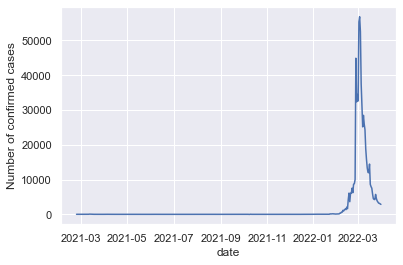

In [37]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x=diffdf.index, y='Number of confirmed cases',
             data= diffdf)

<AxesSubplot:xlabel='date', ylabel='totalDose.daily.total'>

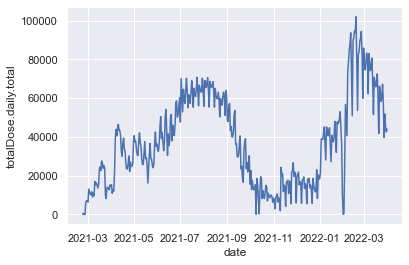

In [38]:
# Plot the responses for different events and regions
sns.lineplot(x=df.index, y='totalDose.daily.total',
             data= df)

<AxesSubplot:xlabel='date', ylabel='Number of death cases'>

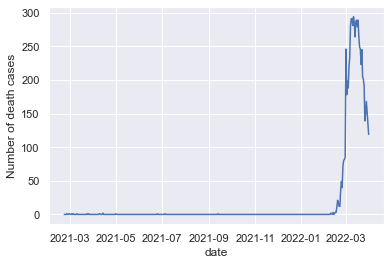

In [39]:
# Plot the responses for different events and regions
sns.lineplot(x=df.index, y='Number of death cases',
             data= df)

<AxesSubplot:xlabel='date', ylabel='totalDose.daily.total'>

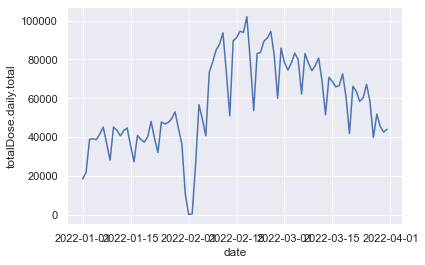

In [40]:
sns.lineplot(x=df.loc['2022-01-01':'2022-03-31'].index, y='totalDose.daily.total',
             data=df.loc['2022-01-01':'2022-03-31'])

<AxesSubplot:xlabel='Number of confirmed cases', ylabel='totalDose.daily.total'>

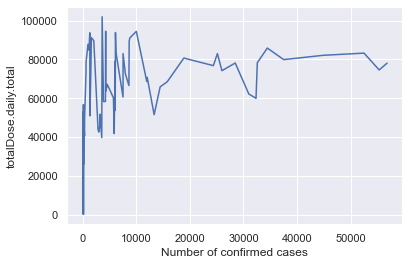

In [41]:
sns.lineplot(x=df.loc['2021-12-01':'2022-03-31','Number of confirmed cases'], y='totalDose.daily.total',
             data=df.loc['2021-01-01':'2022-03-31'])

<AxesSubplot:xlabel='date', ylabel='Number of confirmed cases'>

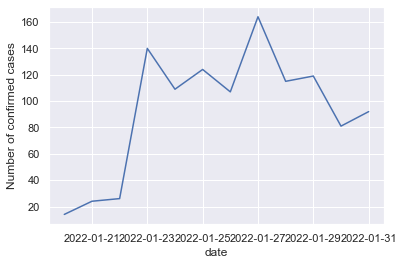

In [42]:
sns.lineplot(x=df.loc['2022-01-20':'2022-01-31'].index, y='Number of confirmed cases',
             data=df.loc['2022-01-20':'2022-01-31'])

In [43]:
###PCA dimension reduction 

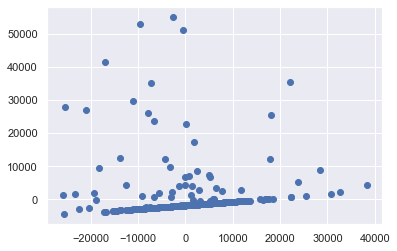

In [44]:
from sklearn import decomposition
nonnullcolumns = [
  "Number of confirmed cases",
  "Number of death cases",
  'totalDose.daily.total'  
]

X = diffdf[nonnullcolumns].dropna()

# Apply principal component analysis for dimension reduction first
pca = decomposition.PCA(n_components=2)
pca.fit(X)
nopendingdiff2d = pca.transform(X)
plt.scatter(nopendingdiff2d[:,0], nopendingdiff2d[:,1])

In [45]:
### K-mean clustering 

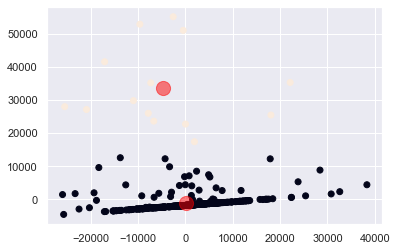

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(nopendingdiff2d)
y_kmeans = kmeans.predict(nopendingdiff2d)
plt.scatter(nopendingdiff2d[:, 0], nopendingdiff2d[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5);

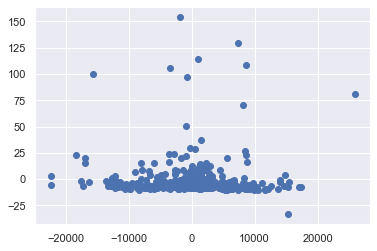

In [47]:
data = diffdf[nonnullcolumns].dropna().loc['2021-02-22':'2022-01-31']

pca.fit(data)
data2d = pca.transform(data)

plt.scatter(data2d[:,0], data2d[:,1])

Regression model slope:     [-1.26906897e-17]
Regression model intercept: 8.286212661925355e-16


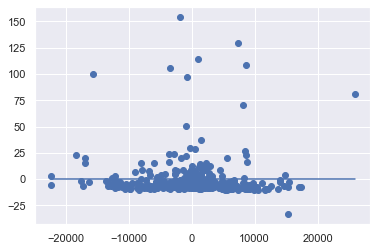

In [48]:
from sklearn.linear_model import LinearRegression

x = data2d[:,0]
y = data2d[:,1]

linearreg = LinearRegression(fit_intercept=True)

# np.newaxis is to add a new dimension
linearreg.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", linearreg.coef_)
print("Regression model intercept:", linearreg.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = linearreg.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

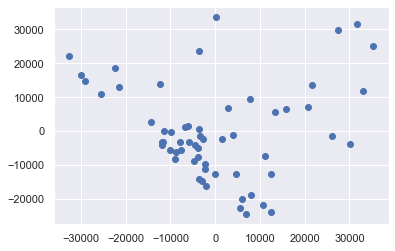

In [49]:
data = diffdf[nonnullcolumns].dropna().loc['2022-02-01':'2022-03-31']

pca.fit(data)
data2d = pca.transform(data)

plt.scatter(data2d[:,0], data2d[:,1])

Regression model slope:     [3.56394235e-16]
Regression model intercept: 4.932852619785372e-13


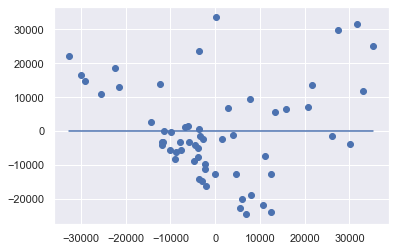

In [50]:
from sklearn.linear_model import LinearRegression

x = data2d[:,0]
y = data2d[:,1]

linearreg = LinearRegression(fit_intercept=True)

# np.newaxis is to add a new dimension
linearreg.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", linearreg.coef_)
print("Regression model intercept:", linearreg.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = linearreg.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

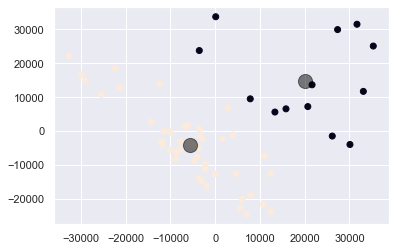

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2d)
y_kmeans = kmeans.predict(data2d)
plt.scatter(data2d[:, 0], data2d[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

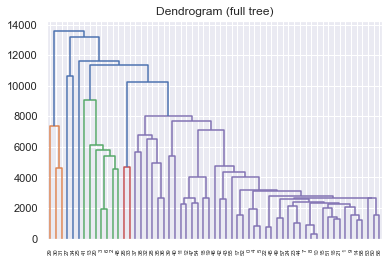

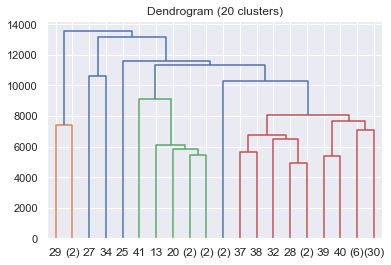

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Dendrogram (full tree)")  
dend = shc.dendrogram(shc.linkage(data2d, method='single'))
plt.figure()
plt.title("Dendrogram (20 clusters)") 
dend1 = shc.dendrogram(shc.linkage(data2d, method='single'), p=20, truncate_mode='lastp')

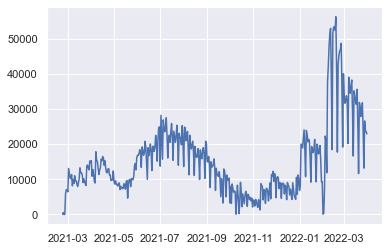

In [53]:
plt.plot(df['totalDose.daily.sinovac'])

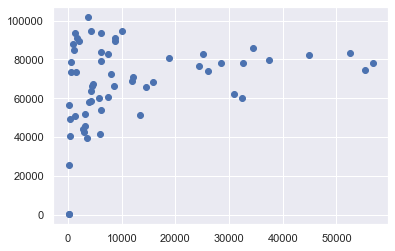

In [54]:
plt.scatter(df.loc['2022-02-01':'2022-03-31','Number of confirmed cases'],df.loc['2022-02-01':'2022-03-31','totalDose.daily.total'])

In [55]:
### GLM and poisson regression

In [56]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(diffdf, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 322
No. of testing examples: 81


In [57]:
diffdf.loc['2022-02-14':'2022-03-31',["Number of confirmed cases","Number of death cases"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number of confirmed cases  46 non-null     float64
 1   Number of death cases      46 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [58]:
df["Number of confirmed cases"] = df["Number of confirmed cases"].astype(int)
df["Number of death cases"] = df["Number of death cases"].astype(int)
df.loc['2022-02-14':'2022-03-31',["Number of confirmed cases","Number of death cases"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Number of confirmed cases  46 non-null     int64
 1   Number of death cases      46 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [59]:
df["totalDose.daily.sinovac"] = df["totalDose.daily.sinovac"].astype(int)
df["totalDose.daily.biontech"] = df["totalDose.daily.biontech"].astype(int)
df["totalDose.daily.total"] = df["totalDose.daily.total"].astype(int)
df.loc['2022-02-14':'2022-03-31',["totalDose.daily.biontech","totalDose.daily.sinovac","totalDose.daily.total"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   totalDose.daily.biontech  46 non-null     int64
 1   totalDose.daily.sinovac   46 non-null     int64
 2   totalDose.daily.total     46 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [60]:
X = np.array(df.loc['2022-02-01':'2022-03-31',["Number of confirmed cases","Number of death cases"]])
X
y = np.array(df.loc['2022-02-01':'2022-03-31',"totalDose.daily.total"])
y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [61]:
y_train

array([ 73437,  91257,  76808,  59946,  93889, 102016,  89411,  62194,
        94562,  74574,  79187,  70774,  85869,  83257,  39695,  89629,
        93723,  53686,  83018,  41776,  67182,  66528,  60237,  42538,
        25790,  63583,  66129,  83605,     85,  56695,  68649,  80708,
        74202,  58266,  78085,  72528,  68527,  87852,  58329,  84812,
        91087,  51522,    317,  40596,  51800,  60608,  44049])

In [62]:
from sklearn import linear_model
from sklearn import preprocessing
clf = linear_model.PoissonRegressor()
X_normalized = preprocessing.normalize(X_train, norm='l2')
clf.fit(X_normalized, y_train)

PoissonRegressor()

In [63]:
clf.score(X_normalized, y_train, sample_weight=None)

0.05045148789948639

In [64]:
clf.coef_

array([ 0.48609221, -4.75022961])

In [65]:
clf.intercept_

10.700276419984572

In [66]:
X_test_norm = preprocessing.normalize(X_test, norm='l2')
y_pred = clf.predict(X_test_norm)

In [67]:
y_pred

array([72140.33749089, 71596.46307315, 57490.32114187, 69716.30196378,
       72140.33749089, 69599.12135856, 68720.36434509, 70158.64263187,
       72140.33749089, 65815.01771367, 72140.33749089, 71532.27498866])

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  11570.094588924549
MSE:  190758195.65354052
RMSE: 13811.52401632566
R2 Score:  0.12943409197670308


## Task 3: Number of confirmed cases for a period of time
21205566 Law Ka Leong

In [3]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

In [4]:
urls = generateAPILinks()
len(urls)

736

In [5]:
urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [6]:
latest_situation_of_reported_cases_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv')
len(latest_situation_of_reported_cases_covid_19_urls)

736

In [7]:
latest_situation_of_reported_cases_covid_19_urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [8]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[0]).head(5)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases
0,08/01/2020,12:00,0,21,17,38,0,0,0
1,09/01/2020,12:00,0,25,23,48,0,0,0
2,10/01/2020,12:00,0,31,23,54,0,0,0
3,11/01/2020,12:00,0,46,15,61,0,0,0
4,12/01/2020,12:00,0,51,16,67,0,0,0


In [9]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[-1]).tail(5)

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
824,11/04/2022,NaN,NaN,NaN,NaN,NaN,8827,60605,NaN,60.0,751820.0,439770.0
825,12/04/2022,NaN,NaN,NaN,NaN,NaN,8886,62035,NaN,58.0,752555.0,440468.0
826,13/04/2022,NaN,NaN,NaN,NaN,NaN,8948,63579,NaN,54.0,753289.0,441006.0
827,14/04/2022,NaN,NaN,NaN,NaN,NaN,9002,65086,NaN,58.0,753868.0,441470.0
828,15/04/2022,NaN,NaN,NaN,NaN,NaN,9069,66797,NaN,56.0,754339.0,441945.0


### Fetching Data

In [10]:
latest_situation_of_reported_cases_covid_19_df = pd.DataFrame()
for u in tqdm(latest_situation_of_reported_cases_covid_19_urls):
  latest_situation_of_reported_cases_covid_19_df = pd.concat([latest_situation_of_reported_cases_covid_19_df, pd.read_csv(u)], ignore_index=True)

100%|█████████████████████████████████████████| 736/736 [06:03<00:00,  2.03it/s]


In [11]:
latest_situation_of_reported_cases_covid_19_df.to_csv('latest_situation_of_reported_cases_covid_19.csv')

In [12]:
latest_situation_of_reported_cases_covid_19_df = pd.read_csv('latest_situation_of_reported_cases_covid_19.csv', index_col=0)

### Data Processing

In [13]:
latest_situation_of_reported_cases_covid_19_df.index = latest_situation_of_reported_cases_covid_19_df['As of date']

In [14]:
type(latest_situation_of_reported_cases_covid_19_df.index)

pandas.core.indexes.base.Index

In [15]:
latest_situation_of_reported_cases_covid_19_df.index = pd.to_datetime(latest_situation_of_reported_cases_covid_19_df.index)

In [16]:
latest_situation_of_reported_cases_covid_19_df.index

DatetimeIndex(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-06-04', '2022-07-04', '2022-08-04', '2022-09-04',
               '2022-10-04', '2022-11-04', '2022-12-04', '2022-04-13',
               '2022-04-14', '2022-04-15'],
              dtype='datetime64[ns]', name='As of date', length=336185, freq=None)

In [17]:
latest_situation_of_reported_cases_covid_19_df = latest_situation_of_reported_cases_covid_19_df[~latest_situation_of_reported_cases_covid_19_df.index.duplicated(keep='first')].to_csv('clean.csv')

In [21]:
df = pd.read_csv('clean.csv', index_col=0)

In [22]:
df = df[df.index.notnull()]

In [23]:
df.index

Index(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
       ...
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-01-04',
       '2022-02-04', '2022-03-04', '2022-04-04', '2022-05-04', '2022-06-04'],
      dtype='object', name='As of date', length=820)

### Exploring Data

In [24]:
df.head(5)

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
As of date,,,,,,,,,,,,,
2020-08-01,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-09-01,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-10-01,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-11-01,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN
2020-12-01,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN


In [25]:
df.tail(5)

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
As of date,,,,,,,,,,,,,
2022-02-04,02/04/2022,NaN,NaN,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0
2022-03-04,03/04/2022,NaN,NaN,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0
2022-04-04,04/04/2022,NaN,NaN,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0
2022-05-04,05/04/2022,NaN,NaN,NaN,NaN,NaN,8349,54168,NaN,71.0,NaN,745253.0,432561.0
2022-06-04,06/04/2022,NaN,NaN,NaN,NaN,NaN,8460,54823,NaN,74.0,NaN,746742.0,433849.0


### Feature engineering

In [27]:
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus'], inplace=True)
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'], inplace=True)

In [26]:
df['Number of confirmed cases per day']= df['Number of confirmed cases'].diff()
df['Number of death cases per day']= df['Number of death cases'].diff()
df

,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests,Number of confirmed cases per day,Number of death cases per day
As of date,,,,,,,,,,,,,,,
2020-08-01,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-10-01,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-11-01,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-12-01,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,02/04/2022,NaN,NaN,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0,NaN,116.0
2022-03-04,03/04/2022,NaN,NaN,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0,NaN,111.0
2022-04-04,04/04/2022,NaN,NaN,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0,NaN,90.0


### Visualization

<AxesSubplot:xlabel='As of date', ylabel='Number of confirmed cases per day'>

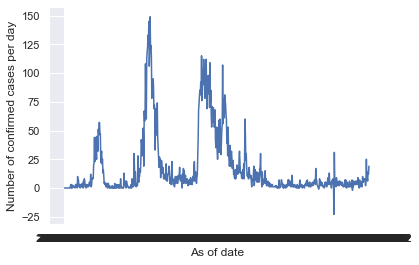

In [34]:
sns.set_theme(style="darkgrid")

sns.lineplot(x=df.index, y='Number of confirmed cases per day',
             data=df)

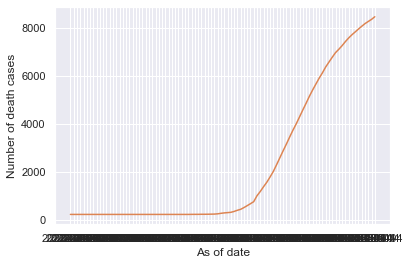

In [35]:
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of confirmed cases per day',
             data=df.loc['2022-03-01':'2022-06-04']);
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of death cases',
             data=df.loc['2022-03-01':'2022-06-04']);

### Virus Predictor using Machine Learning

#### Prepare Data

In [30]:
df.insert(0, 'id', range(1, 1 + len(df)))

In [31]:
df

,id,As of date.1,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests,Number of confirmed cases per day,Number of death cases per day
As of date,,,,,,,,,,,,,,,,
2020-08-01,1,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-10-01,3,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-11-01,4,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2020-12-01,5,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,816,02/04/2022,NaN,740174.0,NaN,NaN,NaN,8061,51468,NaN,79.0,NaN,740174.0,427539.0,NaN,116.0
2022-03-04,817,03/04/2022,NaN,742006.0,NaN,NaN,NaN,8172,52339,NaN,78.0,NaN,742006.0,429416.0,NaN,111.0
2022-04-04,818,04/04/2022,NaN,743595.0,NaN,NaN,NaN,8262,52721,NaN,75.0,NaN,743595.0,430965.0,NaN,90.0


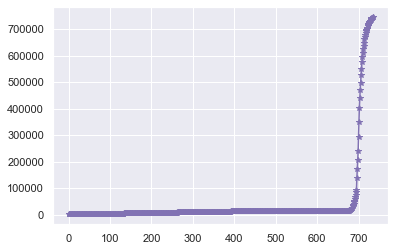

In [32]:
x = np.array(df['id'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
y = np.array(df['Number of confirmed cases'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
plt.plot(y, '-m*')
plt.show()

In [36]:
polyFeat = PolynomialFeatures(degree=4)
x = polyFeat.fit_transform(x)
print(x)

[[1.00000000e+00 8.50000000e+01 7.22500000e+03 6.14125000e+05
  5.22006250e+07]
 [1.00000000e+00 8.60000000e+01 7.39600000e+03 6.36056000e+05
  5.47008160e+07]
 [1.00000000e+00 8.70000000e+01 7.56900000e+03 6.58503000e+05
  5.72897610e+07]
 ...
 [1.00000000e+00 8.18000000e+02 6.69124000e+05 5.47343432e+08
  4.47726927e+11]
 [1.00000000e+00 8.19000000e+02 6.70761000e+05 5.49353259e+08
  4.49920319e+11]
 [1.00000000e+00 8.20000000e+02 6.72400000e+05 5.51368000e+08
  4.52121760e+11]]


### Training Data

------------------------------
TRAINING DATA
------------------------------
Accuracy:73.969 %


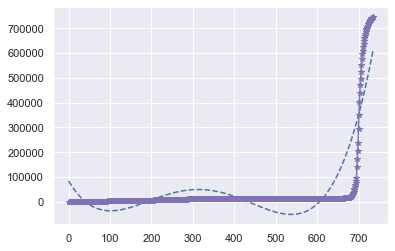

In [37]:
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0, '--b')
plt.plot(y, '-m*')
plt.show()

#### Prediction

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 700 days:2.23 Million


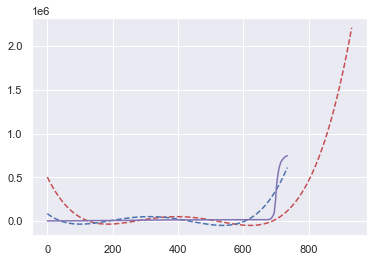

In [38]:
days = 700
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {days} days:', end='')
print(round(int(model.predict(polyFeat.fit_transform([[234+days]])))/1000000,2), 'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1, '--r')
plt.plot(y0, '--b')
plt.plot(y, '-m')

plt.show()

## Task 4: Possible factors that affect death rate
20234198 YIP Cham Sum

### Data fetching

In [4]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

enhanced_sur_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv')

enhanced_sur_covid_19_df = pd.DataFrame()
for u in tqdm(enhanced_sur_covid_19_urls):
  enhanced_sur_covid_19_df = pd.concat([enhanced_sur_covid_19_df, pd.read_csv(u, index_col=0)])
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng.csv')

100%|█████████████████████████████████████████| 698/698 [11:22<00:00,  1.02it/s]


### Data cleaning

In [5]:
# Import dataframe
enhanced_sur_covid_19_df = pd.read_csv('enhanced_sur_covid_19_eng.csv',index_col=0)

# Data Cleaning
enhanced_sur_covid_19_df.drop(enhanced_sur_covid_19_df.iloc[:, [
                              1, 10, 11, 12]], axis=1, inplace=True)
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Hospitalised/Discharged/Deceased'].isin(['Discharged', 'Deceased'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['HK/Non-HK resident'].isin(['HK resident', 'Non-HK resident'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Report date'] != '16/0了7/2020']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Date of onset'].str.contains('/') == True]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '1 month']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '<1']

# Export
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng_clean.csv')

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,8,9,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Simple Visual

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<Figure size 432x288 with 0 Axes>

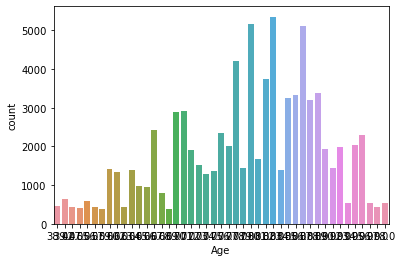

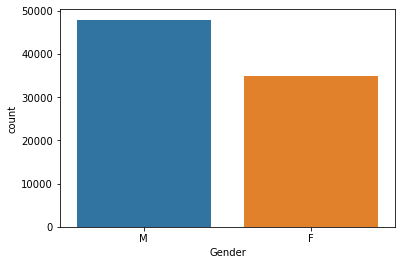

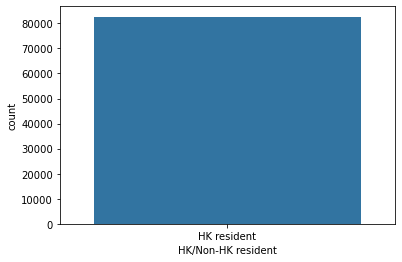

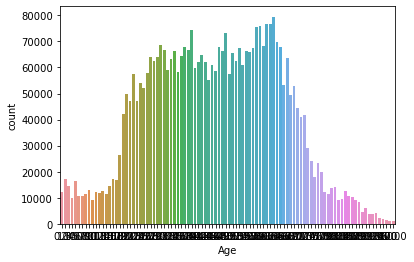

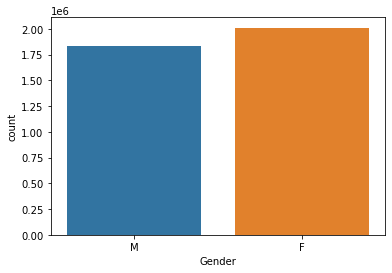

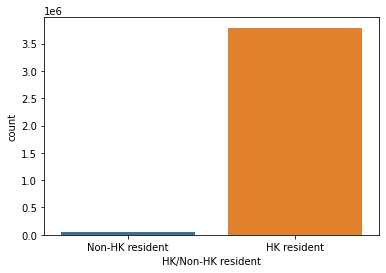

<Figure size 432x288 with 0 Axes>

In [54]:
# Import dataframe
df = pd.read_csv('enhanced_sur_covid_19_eng_clean.csv', index_col=0)

# Filtering
death = df[df['Hospitalised/Discharged/Deceased'] == 'Deceased']
discharge = df[df['Hospitalised/Discharged/Deceased'] == 'Discharged']

# Simple Visual
sns.countplot(data=death,x='Age')
plt.figure()
sns.countplot(data=death,x='Gender')
plt.figure()
sns.countplot(data=death,x='HK/Non-HK resident')
plt.figure()
sns.countplot(data=discharge,x='Age')
plt.figure()
sns.countplot(data=discharge,x='Gender')
plt.figure()
sns.countplot(data=discharge,x='HK/Non-HK resident')
plt.figure()

### Data processing

In [55]:
df['Gender'] = df['Gender'].replace(['M', 'F'], [0, 1])
df['Gender'] = df['Gender'].astype(int)
df['Name of hospital admitted'] = df['Name of hospital admitted'].astype(
    'category')
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].replace(
    ['Discharged', 'Deceased'], [0, 1])
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].astype(
    int)
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].replace(
    ['HK resident', 'Non-HK resident'], [0, 1])
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].astype(
    int)
df['Case classification*'] = df['Case classification*'].astype(
    'category')
df['Age'] = df['Age'].astype(float)
df['Age'] = df['Age'].astype(int)
df['Confirmed/probable'] = df['Confirmed/probable'].astype(
    'category')
df['Report date'] = pd.to_datetime(
    df['Report date'].astype(str), format="%d/%m/%Y")
df['Date of onset'] = pd.to_datetime(
    df['Date of onset'].astype(str), format="%d/%m/%Y")
df.index = df['Date of onset']